In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [36]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
energy_efficiency = fetch_ucirepo(id=242) 
  
# data (as pandas dataframes) 
X = energy_efficiency.data.features 
y = energy_efficiency.data.targets 
  
X.describe()

In [15]:
y = y.drop("Y1", axis=1)
y.head()

,Y2
0,21.33
1,21.33
2,21.33
3,21.33
4,28.28


In [16]:

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
)

reg = LinearRegression().fit(X_train, y_train)
print(r2_score(y_test, reg.predict(X_test)))
test_df = pd.DataFrame()
test_df["actual"] = y_test
test_df["pred"] = reg.predict(X_test)
test_df.head(10)

0.8932269811749011


,actual,pred
668,16.90,19.754929
324,16.39,16.771320
624,32.78,32.024928
690,46.23,36.702527
473,19.76,17.276863
204,24.61,31.096276
97,25.63,27.610129
336,29.62,29.773056
568,22.72,19.338575
148,34.14,29.927040


In [33]:
def pred_model(model, model_name, X_train, y_train, X_test, y_test):
    print(model_name)
    # Training model
    model.fit(X_train, y_train)

    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test, y_pred_test)

    # Printing results
    print("R2 : ", round(R2_test_model, 4))
    # Y_test vs Y_train scatter plot
    plt.xlim((10, 50))
    plt.ylim((10, 50))
    plt.scatter(x=y_test, y=y_pred_test, marker="v", s=20)
    plt.xlabel("y_test")
    plt.ylabel("y_pred")

    lims = [
    np.min([plt.xlim(), plt.ylim()]),  # min of both axes
    np.max([plt.xlim(), plt.ylim()]),  # max of both axes
    ] 
    
    plt.plot(lims, lims, color='red', linestyle='--')
    plt.grid(color="green", linestyle="--", linewidth=0.5)

    plt.show()


LinearRegression
R2 :  0.8932


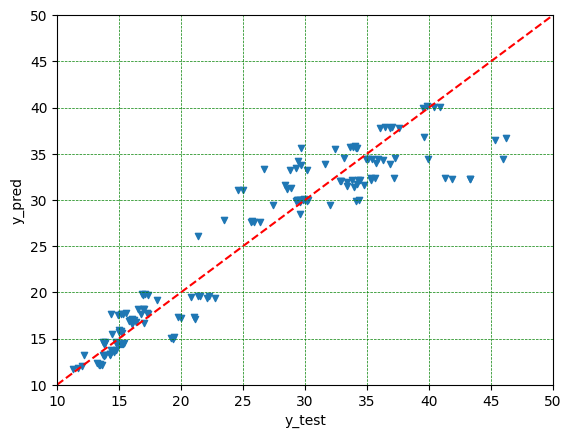

In [34]:
linreg = LinearRegression()
pred_model(linreg, "LinearRegression", X_train, y_train, X_test, y_test)

PolynomialRegression
R2 :  0.9545


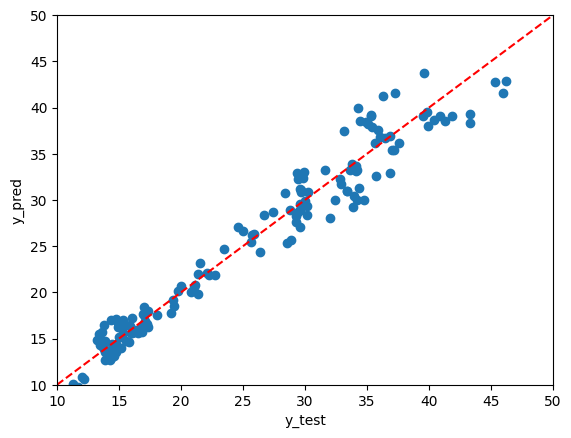

In [19]:
poly = PolynomialFeatures()
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

pred_model(linreg, "PolynomialRegression", X_train_poly, y_train, X_test_poly, y_test)